In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("/kaggle/input/digit-recognizer/train.csv") #loading the dataset from local storage

In [3]:
ds.head() #intro of the dataset 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label = ds["label"]
ds = ds.drop("label",axis = 1) 
print(label) #printing the label of the dataset and dropping from the dataset

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


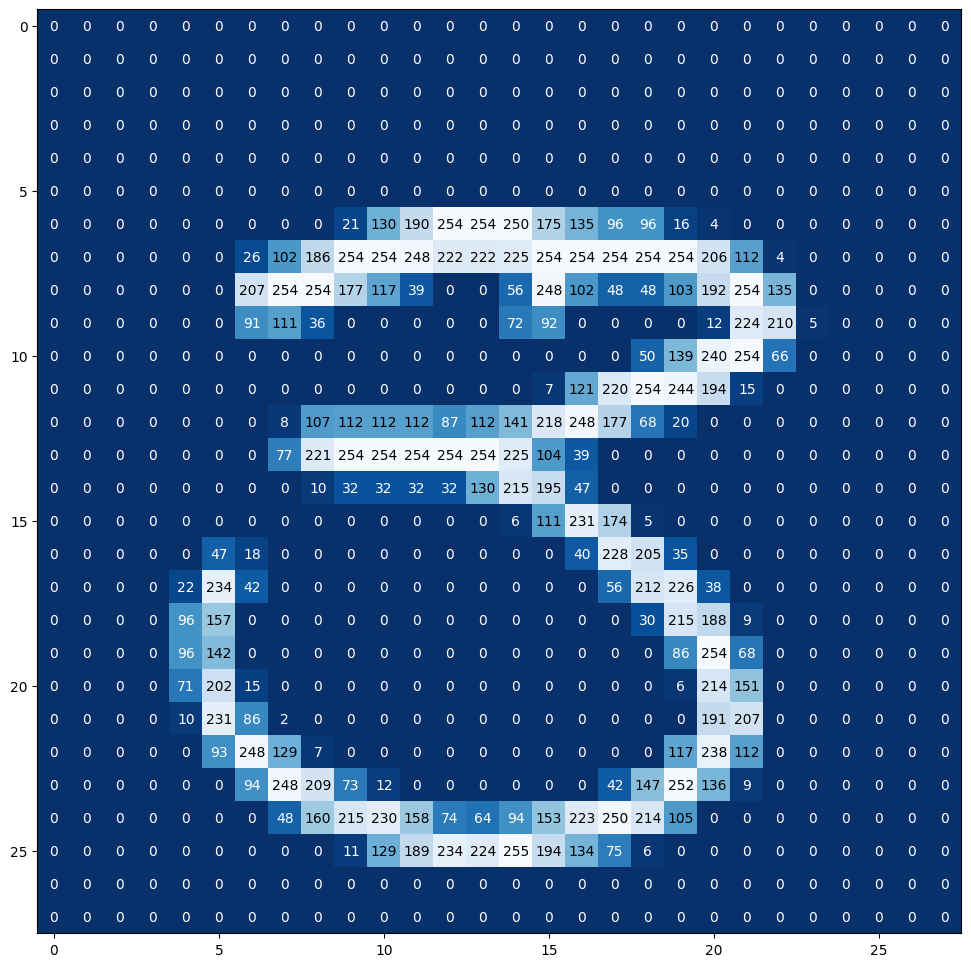

In [5]:
img = ds.iloc[7, :].values.reshape(28, 28) #for visualizing purpose it should be converted from dataframe 
fig = plt.figure(figsize = (12,12)) #size of the image 12 inch L*B
ax = fig.add_subplot(111)#subplot of single grip
ax.imshow(img, cmap='Blues_r')
width, height = img.shape
thresh = img.max()/2.5 #for pixel 255 
for x in range(width):
    for y in range(height): #x 0 - 27 ,, y - 0,27
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [6]:
from sklearn.decomposition import PCA

# Initialize PCA to preserve 95% variance
pca = PCA(n_components=0.95)

# Fit PCA to the data and transform
X_pca = pca.fit_transform(ds)

# Number of components chosen to preserve 95% variance
print(f"Number of components: {pca.n_components_}")
print(f"Transformed shape: {X_pca.shape}")


Number of components: 154
Transformed shape: (42000, 154)


In [7]:
"""
Principal Components: These are the directions in the feature space that maximize the variance. They are the new axes or coordinates after transformation.
Cumulative Variance: This is a measure of how much of the total variance in the data is captured by the first 
n principal components. It helps decide how many components to retain."""

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio per component:", explained_variance_ratio)
print("Cumulative explained variance:", np.cumsum(explained_variance_ratio)) 

Explained variance ratio per component: [0.09748938 0.07160266 0.06145903 0.05379302 0.04894262 0.04303214
 0.03277051 0.02892103 0.02766902 0.02348871 0.02099325 0.02059001
 0.01702553 0.01692787 0.01581126 0.0148324  0.01319688 0.01282727
 0.01187976 0.01152755 0.01072191 0.01015199 0.00964902 0.00912846
 0.00887641 0.00838766 0.00811856 0.00777406 0.00740635 0.00686661
 0.00657982 0.00638799 0.00599367 0.00588913 0.00564335 0.00540967
 0.00509222 0.00487505 0.00475569 0.00466545 0.00452952 0.00444989
 0.00418255 0.00397506 0.00384542 0.00374919 0.00361013 0.00348522
 0.00336488 0.00320738 0.00315467 0.00309146 0.00293709 0.00286541
 0.00280759 0.00269618 0.00265831 0.00256299 0.00253821 0.00246178
 0.00239716 0.0023874  0.00227591 0.00221518 0.00213934 0.00206133
 0.00202851 0.00195977 0.00193639 0.00188485 0.00186751 0.0018167
 0.00176891 0.00172592 0.00166121 0.0016331  0.00160601 0.00154472
 0.0014685  0.00142376 0.00141098 0.00140228 0.00138835 0.00135417
 0.00132307 0.0013078  

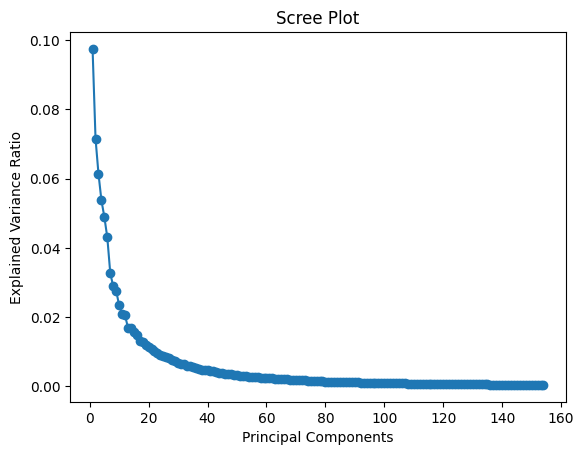

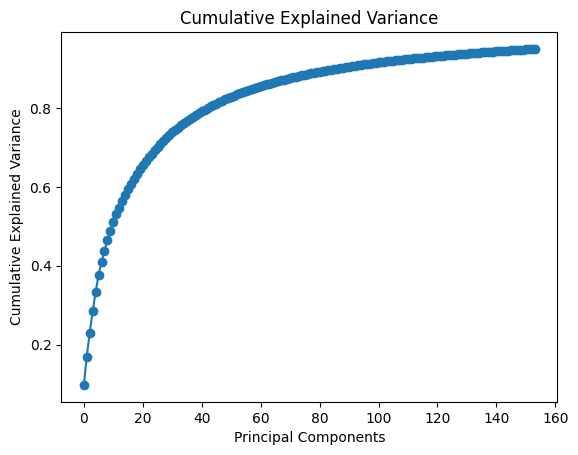

In [8]:
# Scree plot
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Cumulative variance plot
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()


In [9]:
#reduced dimensions information 
print("Transformed data shape:", X_pca.shape)
print(ds.shape)

Transformed data shape: (42000, 154)
(42000, 784)


In [10]:
ds_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv") #loading the dataset from local storage

In [11]:
X_test_pca = pca.transform(ds_test)

In [12]:
# Initialize the KMeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the KMeans model on the PCA-transformed training data
kmeans.fit(X_pca)

# Predict the clusters on the test data 
y_pred_kmeans = kmeans.predict(X_test_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
print(type(y_pred_kmeans))

<class 'numpy.ndarray'>


In [14]:

image_ids = np.arange(1, 28001)  # This is your 'imageId' data (1 to 100)

# Create a DataFrame with both columns
df = pd.DataFrame({
    'imageId': image_ids,
    'label': y_pred_kmeans
})

# Save the DataFrame to a CSV file
df.to_csv('ImageOutput2.csv', index=False)

# Confirm the save by checking the first few rows
print(df.head())


   imageId  label
0        1      2
1        2      0
2        3      8
3        4      8
4        5      2
